# Race & Ethnicity

In [1]:
#IMPORT necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import textwrap
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
#DB CONNECTION

import psycopg2
from psycopg2 import sql
from psycopg2.extensions import adapt, register_adapter, AsIs
from sqlalchemy import create_engine,text
import getpass
import re
from sklearn.preprocessing import normalize

# Data Acquisition 

In [ ]:
#connection string
database = 'f24t03'
user = 'jsmm8'
password = getpass.getpass("Type password and hit enter: ")



Type password and hit enter: ········


In [ ]:
try:
    #connect to the PostgreSQL database
    connection = psycopg2.connect(dbname=database, user=user, password=password, host='pgsql')
    cursor = connection.cursor()

    #Execute a query to get all table names
    cursor.execute("""
        SELECT table_name 
        FROM information_schema.tables 
        WHERE table_schema = 'public';
    """)
    
    # Fetch all results
    tables = cursor.fetchall()

    # Print the table names
    print("Tables in the database:")
    for table in tables:
        print(table[0])

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the cursor and connection
    if cursor:
        cursor.close()
    if connection:
        connection.close()

Tables in the database:
ethnicity
year_built
education_levels
tenure_by_bedrooms
tenure_by_kitchen
tenure_by_plumbing
education_data_processed
rooms
imputed_median_house_value
staging_race_data
demographics_master
education_categories
year_structure_built
race_data_processed
mortgage
tenure_by_rooms
housing_stats_data
merged_new_house_data
bedrooms
educational_attainment
employment_status
geo_mobility
home_value
house_heating_fuel
race_migration_data
household_income
internet_subscription
income_to_poverty_ratio
median_home_value
median_household_income
median_rooms_by_tenure
occupancy_status
plumbing_facilities
poverty_status
mortgage_status
housing_pct_change_stats_data
income_pct_change
income_data_processed


In [ ]:
#Create the connection and extract data from 'ethnicity' table
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the ethnicity table
query = "SELECT * FROM ethnicity;"

try:
    df = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df.shape

I am able to connect to the database
Data extracted successfully!


(24105, 48)

# Data Carpentry/Data Cleaning

In [6]:
#Split the data into yearly dataframes to work on one year data and process all others when base code is ready
df_2022 = df[df['year'] == 2022]
df_2021 = df[df['year'] == 2021]
df_2020 = df[df['year'] == 2020]
df_2018 = df[df['year'] == 2018]
df_2019 = df[df['year'] == 2019]

#Check sample
df_2022.head()

,geo_id,block_group,census_tract,county,state,est_total,moe_total,est_non_his_lat,moe_non_his_lat,est_non_his_lat_white,...,moe_his_lat_pac_isl,est_his_lat_other,moe_his_lat_other,est_his_lat_multi,moe_his_lat_multi,est_his_lat_multi_other,moe_his_lat_multi_other,est_his_lat_multi_excl_other,moe_his_lat_multi_excl_other,year
19074,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,1121,187,1116,187,1096,...,12,0,12,5,11,5,11,0,12,2022
19075,1500000US290019501002,Block Group 2,Census Tract 9501,Adair County,Missouri,1589,304,1589,304,1562,...,12,0,12,0,12,0,12,0,12,2022
19076,1500000US290019501003,Block Group 3,Census Tract 9501,Adair County,Missouri,961,247,832,216,825,...,12,0,12,0,12,0,12,0,12,2022
19077,1500000US290019502001,Block Group 1,Census Tract 9502,Adair County,Missouri,1031,218,974,210,920,...,12,0,12,20,35,20,35,0,12,2022
19078,1500000US290019502002,Block Group 2,Census Tract 9502,Adair County,Missouri,998,247,998,247,979,...,12,0,12,0,12,0,12,0,12,2022


In [7]:
#check structure
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 19074 to 24104
Data columns (total 48 columns):
geo_id                              5031 non-null object
block_group                         5031 non-null object
census_tract                        5031 non-null object
county                              5031 non-null object
state                               5031 non-null object
est_total                           5031 non-null int64
moe_total                           5031 non-null int64
est_non_his_lat                     5031 non-null int64
moe_non_his_lat                     5031 non-null int64
est_non_his_lat_white               5031 non-null int64
moe_non_his_lat_white               5031 non-null int64
est_non_his_lat_black               5031 non-null int64
moe_non_his_lat_black               5031 non-null int64
est_non_his_lat_native              5031 non-null int64
moe_non_his_lat_native              5031 non-null int64
est_non_his_lat_asian               5031 no

In [8]:
# extract columns with 'MOE_' in their names
columns_to_drop = [col for col in df_2022.columns if 'moe_' in col]

#Print 
print(columns_to_drop)



['moe_total', 'moe_non_his_lat', 'moe_non_his_lat_white', 'moe_non_his_lat_black', 'moe_non_his_lat_native', 'moe_non_his_lat_asian', 'moe_non_his_lat_pac_isl', 'moe_non_his_lat_other', 'moe_non_his_lat_multi', 'moe_non_his_lat_multi_other', 'moe_non_his_lat_multi_excl_other', 'moe_his_lat', 'moe_his_lat_white', 'moe_his_lat_black', 'moe_his_lat_native', 'moe_his_lat_asian', 'moe_his_lat_pac_isl', 'moe_his_lat_other', 'moe_his_lat_multi', 'moe_his_lat_multi_other', 'moe_his_lat_multi_excl_other']


In [9]:
# Drop the above columns
df_cleaned = df_2022.drop(columns=columns_to_drop)
#check structure
df_cleaned.head(1)

,geo_id,block_group,census_tract,county,state,est_total,est_non_his_lat,est_non_his_lat_white,est_non_his_lat_black,est_non_his_lat_native,...,est_his_lat_white,est_his_lat_black,est_his_lat_native,est_his_lat_asian,est_his_lat_pac_isl,est_his_lat_other,est_his_lat_multi,est_his_lat_multi_other,est_his_lat_multi_excl_other,year
19074,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,1121,1116,1096,0,0,...,0,0,0,0,0,0,5,5,0,2022


In [10]:
#Drop total column
df_2022 = df_cleaned.drop('est_total',axis = 1)
#Check sample
df_2022.head(2)

,geo_id,block_group,census_tract,county,state,est_non_his_lat,est_non_his_lat_white,est_non_his_lat_black,est_non_his_lat_native,est_non_his_lat_asian,...,est_his_lat_white,est_his_lat_black,est_his_lat_native,est_his_lat_asian,est_his_lat_pac_isl,est_his_lat_other,est_his_lat_multi,est_his_lat_multi_other,est_his_lat_multi_excl_other,year
19074,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,1116,1096,0,0,0,...,0,0,0,0,0,0,5,5,0,2022
19075,1500000US290019501002,Block Group 2,Census Tract 9501,Adair County,Missouri,1589,1562,0,0,7,...,0,0,0,0,0,0,0,0,0,2022


In [11]:
#create non hispanic subset
not_hispanic_columns = [col for col in df_2022.columns if 'est_non_his_' in col]

# Get the first 5 columns
first_five_columns = df_2022.columns[:5]

# Combine the columns with the first 5 columns
all_columns = list(first_five_columns) + not_hispanic_columns

#print list
print(all_columns)

['geo_id', 'block_group', 'census_tract', 'county', 'state', 'est_non_his_lat', 'est_non_his_lat_white', 'est_non_his_lat_black', 'est_non_his_lat_native', 'est_non_his_lat_asian', 'est_non_his_lat_pac_isl', 'est_non_his_lat_other', 'est_non_his_lat_multi', 'est_non_his_lat_multi_other', 'est_non_his_lat_multi_excl_other']


In [12]:
# Create the new non hispanic DataFrame with the selected columns 
df_not_hispanic = df_2022[all_columns]
df_not_hispanic.columns = [col.replace('est_non_his_lat_', '') for col in df_not_hispanic.columns]
df_not_hispanic = df_not_hispanic.drop('est_non_his_lat',axis = 1)
df_not_hispanic = df_not_hispanic.drop('multi',axis = 1)

In [13]:
#check shape
df_not_hispanic.shape

(5031, 13)

In [14]:
#check sample
df_not_hispanic.head(2)

,geo_id,block_group,census_tract,county,state,white,black,native,asian,pac_isl,other,multi_other,multi_excl_other
19074,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,1096,0,0,0,0,6,0,14
19075,1500000US290019501002,Block Group 2,Census Tract 9501,Adair County,Missouri,1562,0,0,7,0,0,0,20


In [15]:
#create hispanic columns
columns_hispanic = [col for col in df_2022.columns if col not in not_hispanic_columns]
#Print columns
print(columns_hispanic)
# Create the new hispanic with only the remaining columns
df_hispanic = df_2022[columns_hispanic]


['geo_id', 'block_group', 'census_tract', 'county', 'state', 'est_his_lat', 'est_his_lat_white', 'est_his_lat_black', 'est_his_lat_native', 'est_his_lat_asian', 'est_his_lat_pac_isl', 'est_his_lat_other', 'est_his_lat_multi', 'est_his_lat_multi_other', 'est_his_lat_multi_excl_other', 'year']


In [16]:
#rename columns to drop
df_hispanic.columns = [col.replace('est_his_lat_', 'drop') for col in df_hispanic.columns]
columns_to_drop = [col for col in df_hispanic.columns if 'drop' in col]
#print list
columns_to_drop

['dropwhite',
 'dropblack',
 'dropnative',
 'dropasian',
 'droppac_isl',
 'dropother',
 'dropmulti',
 'dropmulti_other',
 'dropmulti_excl_other']

In [17]:
# Drop the above columns
df_hispanic = df_hispanic.drop(columns=columns_to_drop)
df_hispanic.rename(columns={'est_his_lat': 'Hispanic or Latino'}, inplace=True)

In [18]:
#check sample
df_hispanic.head(2)

,geo_id,block_group,census_tract,county,state,Hispanic or Latino,year
19074,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,5,2022
19075,1500000US290019501002,Block Group 2,Census Tract 9501,Adair County,Missouri,0,2022


In [19]:
#check shape
df_hispanic.shape

(5031, 7)

In [20]:
#Merge both hispanic & non hispanic datasets
merged_df = pd.merge(df_not_hispanic, df_hispanic, 
                     on='geo_id',  
                     how='inner')

#Check df
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 5030
Data columns (total 19 columns):
geo_id                5031 non-null object
block_group_x         5031 non-null object
census_tract_x        5031 non-null object
county_x              5031 non-null object
state_x               5031 non-null object
white                 5031 non-null int64
black                 5031 non-null int64
native                5031 non-null int64
asian                 5031 non-null int64
pac_isl               5031 non-null int64
other                 5031 non-null int64
multi_other           5031 non-null int64
multi_excl_other      5031 non-null int64
block_group_y         5031 non-null object
census_tract_y        5031 non-null object
county_y              5031 non-null object
state_y               5031 non-null object
Hispanic or Latino    5031 non-null int64
year                  5031 non-null int64
dtypes: int64(10), object(9)
memory usage: 786.1+ KB


In [21]:
#drop duplicate columns
merged_df.drop(columns=['block_group_y','census_tract_y','county_y','state_y','year'], inplace=True)

#rename the other columns
merged_df.rename(columns={'block_group_x': 'block_group'}, inplace=True)
merged_df.rename(columns={'census_tract_x': 'census_tract'}, inplace=True)
merged_df.rename(columns={'county_x': 'county'}, inplace=True)
merged_df.rename(columns={'state_x': 'state'}, inplace=True)
# Check the shape of the merged DataFrame
print(merged_df.shape)

(5031, 14)


In [22]:
#select others race groups
col1 = 'multi_excl_other'
col2 = 'multi_other'

# Create the new column by adding these two columns together
merged_df['two or more races'] = merged_df[col1] + merged_df[col2]

#drop the original columns 
merged_df.drop(columns=[col1, col2], inplace=True)

In [23]:
#check sample geo_id
merged_df[merged_df['geo_id'] == '1500000US290019501001']

,geo_id,block_group,census_tract,county,state,white,black,native,asian,pac_isl,other,Hispanic or Latino,two or more races
0,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,1096,0,0,0,0,6,5,14


In [24]:
#melt the dataset for next step of analysis
merged_df_melted = merged_df.melt(
    id_vars=['geo_id', 'block_group','census_tract','county','state'],
    var_name='Race',
    value_name='Population count'
)

In [25]:
#check sample
merged_df_melted[merged_df_melted['geo_id'] == '1500000US290019501001']

,geo_id,block_group,census_tract,county,state,Race,Population count
0,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,white,1096
5031,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,black,0
10062,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,native,0
15093,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,asian,0
20124,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,pac_isl,0
25155,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,other,6
30186,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,Hispanic or Latino,5
35217,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,two or more races,14


In [26]:
# Display the updated DataFrame

merged_df_melted.head(10)


,geo_id,block_group,census_tract,county,state,Race,Population count
0,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,white,1096
1,1500000US290019501002,Block Group 2,Census Tract 9501,Adair County,Missouri,white,1562
2,1500000US290019501003,Block Group 3,Census Tract 9501,Adair County,Missouri,white,825
3,1500000US290019502001,Block Group 1,Census Tract 9502,Adair County,Missouri,white,920
4,1500000US290019502002,Block Group 2,Census Tract 9502,Adair County,Missouri,white,979
5,1500000US290019502003,Block Group 3,Census Tract 9502,Adair County,Missouri,white,1000
6,1500000US290019503001,Block Group 1,Census Tract 9503,Adair County,Missouri,white,563
7,1500000US290019503002,Block Group 2,Census Tract 9503,Adair County,Missouri,white,558
8,1500000US290019503003,Block Group 3,Census Tract 9503,Adair County,Missouri,white,1018
9,1500000US290019503004,Block Group 4,Census Tract 9503,Adair County,Missouri,white,813


In [27]:
#check shape
merged_df_melted.shape

(40248, 7)

In [28]:
#check for na
merged_df_melted.isna().sum()

geo_id              0
block_group         0
census_tract        0
county              0
state               0
Race                0
Population count    0
dtype: int64

In [29]:
#check describe stats
merged_df_melted.describe()

,Population count
count,40248.000000
mean,152.912493
std,382.493258
min,0.000000
25%,0.000000
50%,0.000000
75%,61.000000
max,4427.000000


In [30]:
#cross check unique races
merged_df_melted['Race'].unique()

array(['white', 'black', 'native', 'asian', 'pac_isl', 'other',
       'Hispanic or Latino', 'two or more races'], dtype=object)

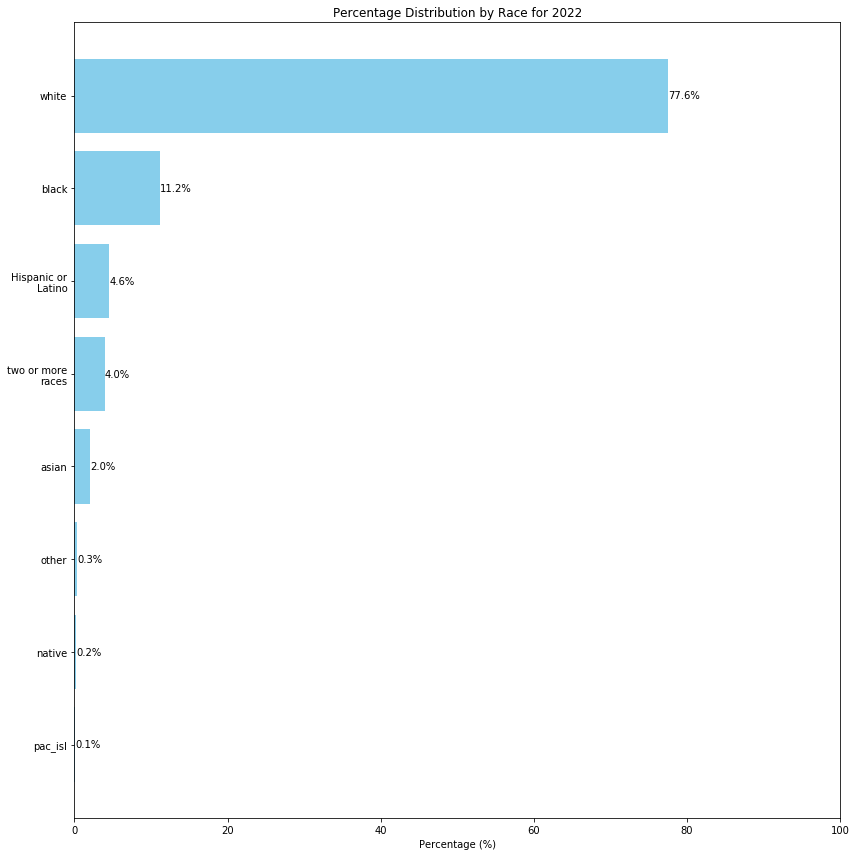

In [31]:
#create wrap text for race column names
def wrap_text(text, width=20):
    return "\n".join(textwrap.fill(text, width=width).splitlines())

#Prepare data and reset index
tot_population = merged_df_melted.groupby('Race')['Population count'].sum().reset_index()

# Calculate total population 
total_population = tot_population['Population count'].sum()

# Calculate percentage distribution
tot_population['Percentage'] = (tot_population['Population count'] / total_population) * 100

# Sort the DataFrame by Percentage in ascending order
tot_population.sort_values(by='Percentage', ascending=True, inplace=True)

# Apply text wrapping to the race categories
tot_population['Wrapped_Race'] = tot_population['Race'].apply(lambda x: wrap_text(x, width=15))

# Plot the distribution
plt.figure(figsize=(12, 12))  

# Create horizontal bar plot
bars = plt.barh(tot_population['Wrapped_Race'], tot_population['Percentage'], color='skyblue')

# Add percentages on the end of each bar
for bar in bars:
    xval = bar.get_width() 
    plt.text(
        xval,  
        bar.get_y() + bar.get_height() / 2,  
        f'{xval:.1f}%',  
        ha='left',  
        va='center',  
        fontsize=10, 
        color='black' 
    )

plt.xlim(0, 100)
plt.xlabel('Percentage (%)')
plt.title('Percentage Distribution by Race for 2022')
plt.tight_layout()  
plt.show()

Others, Native Americans & Pacific Islanders are only around 0.6% overall in Missouri 

# Engineer or create new variables

In [32]:
#Define diversity indexes to study race diversity

# Function to calculate shannon diversity
def shannon_diversity_index(population_counts):
    total = np.sum(population_counts)
    proportions = population_counts / total
    return -np.sum(proportions * np.log(proportions + 1e-9))  # Adding small constant to avoid log(0)

# Function to calculate simpsons diversity
def simpsons_diversity_index(population_counts):
    total = np.sum(population_counts)
    proportions = population_counts / total
    return 1 - np.sum(proportions**2)

# Function to calculate Richness
def richness_index(population_counts):
    return (population_counts > 0).sum()  # Count of non-zero race groups only

# Function to calculate Simpson's Dominance
def simpsons_dominance_index(population_counts):
    total = np.sum(population_counts)
    proportions = population_counts / total
    return np.sum(proportions**2)

# Function to calculate Berger–Parker Dominance
def berger_parker_dominance(population_counts):
    total = np.sum(population_counts)
    if total != 0:
        return np.max(population_counts) / total
    return 0

# Function to calculate simpsons evenness
def simpson_evenness_index(population_counts):
    richness = richness_index(population_counts)
    simpson_diversity = simpsons_diversity_index(population_counts)
    if richness > 1:
        D_max = 1 - 1/richness
        return simpson_diversity / D_max
    return 0


In [33]:
#Check sample
merged_df_melted.head()

,geo_id,block_group,census_tract,county,state,Race,Population count
0,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,white,1096
1,1500000US290019501002,Block Group 2,Census Tract 9501,Adair County,Missouri,white,1562
2,1500000US290019501003,Block Group 3,Census Tract 9501,Adair County,Missouri,white,825
3,1500000US290019502001,Block Group 1,Census Tract 9502,Adair County,Missouri,white,920
4,1500000US290019502002,Block Group 2,Census Tract 9502,Adair County,Missouri,white,979


In [34]:
#drop text columsn which are not needed
merged_df_melted = merged_df_melted.drop(['state', 'block_group','census_tract','county'],axis =1)
#unstack the merged data
block_group_level = merged_df_melted.groupby(['geo_id','Race'])['Population count'].sum().unstack(fill_value=0)
#Create new total population 
block_group_level['Total_Population'] = block_group_level.sum(axis=1)

In [35]:
#validate again
block_group_level.head()

Race,Hispanic or Latino,asian,black,native,other,pac_isl,two or more races,white,Total_Population
geo_id,,,,,,,,,
1500000US290019501001,5,0,0,0,6,0,14,1096,1121
1500000US290019501002,0,7,0,0,0,0,20,1562,1589
1500000US290019501003,129,0,1,3,0,0,3,825,961
1500000US290019502001,57,13,0,0,0,13,28,920,1031
1500000US290019502002,0,0,0,0,0,0,19,979,998


In [36]:
#Create indexes
block_group_level['Shannon_Index'] = block_group_level.drop(columns=['Total_Population']).apply(shannon_diversity_index, axis=1)
block_group_level['Simpsons_Index'] = block_group_level.drop(columns=['Total_Population','Shannon_Index']).apply(simpsons_diversity_index, axis=1)
block_group_level['Richness'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index']).apply(richness_index, axis=1)
block_group_level['Simpson_Dominance'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness']).apply(simpsons_dominance_index, axis=1)
block_group_level['Berger_Parker_Dominance'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness','Simpson_Dominance']).apply(berger_parker_dominance, axis=1)
block_group_level['Simpson_Evenness'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness','Simpson_Dominance','Berger_Parker_Dominance']).apply(simpson_evenness_index, axis=1)



In [37]:
#Check data
block_group_level.head()

Race,Hispanic or Latino,asian,black,native,other,pac_isl,two or more races,white,Total_Population,Shannon_Index,Simpsons_Index,Richness,Simpson_Dominance,Berger_Parker_Dominance,Simpson_Evenness
geo_id,,,,,,,,,,,,,,,
1500000US290019501001,5,0,0,0,6,0,14,1096,1121,0.128924,0.043901,4,0.956099,0.977698,0.058535
1500000US290019501002,0,7,0,0,0,0,20,1562,1589,0.095813,0.033517,3,0.966483,0.983008,0.050276
1500000US290019501003,129,0,1,3,0,0,3,825,961,0.443730,0.244971,5,0.755029,0.858481,0.306214
1500000US290019502001,57,13,0,0,0,13,28,920,1031,0.469935,0.199622,5,0.800378,0.892338,0.249527
1500000US290019502002,0,0,0,0,0,0,19,979,998,0.094271,0.037351,2,0.962649,0.980962,0.074703


# Basic Stats and visuals

In [38]:
#Check stats for indexes
block_group_level[['Richness', 'Simpson_Dominance', 'Berger_Parker_Dominance', 'Simpson_Evenness','Shannon_Index','Simpsons_Index']].describe()

Race,Richness,Simpson_Dominance,Berger_Parker_Dominance,Simpson_Evenness,Shannon_Index,Simpsons_Index
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03,5031.000000
mean,3.896243,0.733855,0.826278,0.354304,5.181578e-01,0.266145
std,1.324028,0.190959,0.155378,0.242169,3.311435e-01,0.190959
min,0.000000,0.000000,0.000000,0.000000,-1.000000e-09,0.000000
25%,3.000000,0.593359,0.749357,0.157313,2.518279e-01,0.109630
50%,4.000000,0.775853,0.876049,0.306839,4.642873e-01,0.224147
75%,5.000000,0.890370,0.942378,0.534561,7.615576e-01,0.406641
max,8.000000,1.000000,1.000000,0.999659,1.553181e+00,1.000000


In [39]:
# Visualization for indexes distribution data
def plot_diversity_indices(df, title):
    plt.figure(figsize=(18, 12))
    
    # Shannon Index Histogram
    plt.subplot(3, 2, 1)
    plt.hist(df['Shannon_Index'], bins=20, color='skyblue')
    plt.title(f'{title} Shannon Diversity Index Distribution')
    plt.xlabel('Shannon Index')
    plt.ylabel('Frequency')

    # Simpson's Index Histogram
    plt.subplot(3, 2, 2)
    plt.hist(df['Simpsons_Index'], bins=20, color='salmon')
    plt.title(f'{title} Simpson\'s Diversity Index Distribution')
    plt.xlabel('Simpson\'s Index')
    plt.ylabel('Frequency')
    
    # Richness Index Histogram
    plt.subplot(3, 2, 3)
    plt.hist(df['Richness'], bins=20, color='lightgreen')
    plt.title(f'{title} Richness Index Distribution')
    plt.xlabel('Richness Index')
    plt.ylabel('Frequency')
    
    # Simpson Dominance Index Histogram
    plt.subplot(3, 2, 4)
    plt.hist(df['Simpson_Dominance'], bins=20, color='coral')
    plt.title(f'{title} Simpson_Dominance Index Distribution')
    plt.xlabel('Simpson_Dominance Index')
    plt.ylabel('Frequency')

    # Berger-Parker Dominance Index Histogram
    plt.subplot(3, 2, 5)
    plt.hist(df['Berger_Parker_Dominance'], bins=20, color='peachpuff')
    plt.title(f'{title} Berger_Parker_Dominance Index Distribution')
    plt.xlabel('Berger_Parker_Dominance Index')
    plt.ylabel('Frequency')
    
    # Simpson Evenness Index Histogram
    plt.subplot(3, 2, 6)
    plt.hist(df['Simpson_Evenness'], bins=20, color='lavender')
    plt.title(f'{title} Simpson_Evenness Index Distribution')
    plt.xlabel('Simpson_Evenness Index')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()



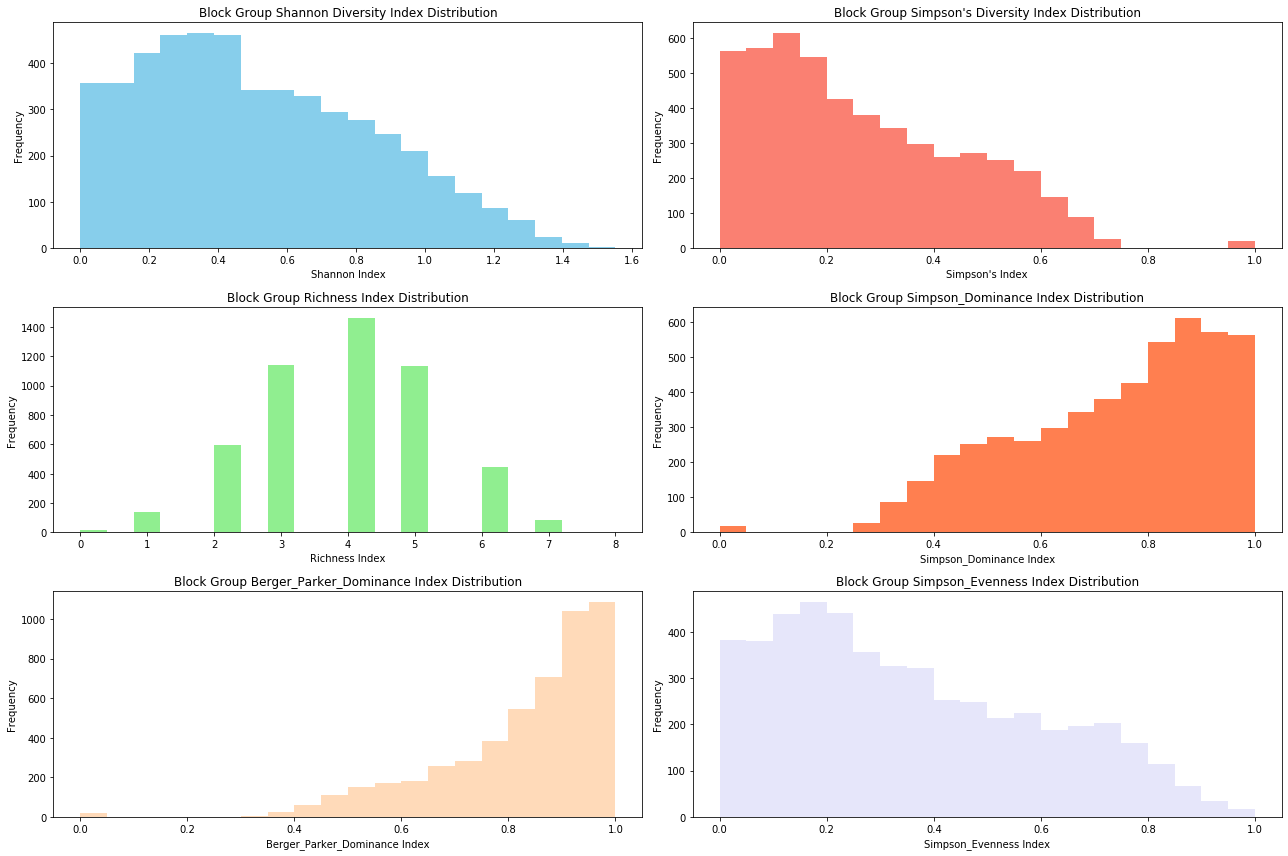

In [40]:
# Plot diversity indices for blockgroup levels
plot_diversity_indices(block_group_level, 'Block Group')

* Simpsons index and Simpsons dominance have inverse relationship
* Shannon index, simpsons Index and Simpsons evenness index have positive skew
* Berger parker dominance and simpsons dominance have negative skew
* Richness index is having a normal distribution

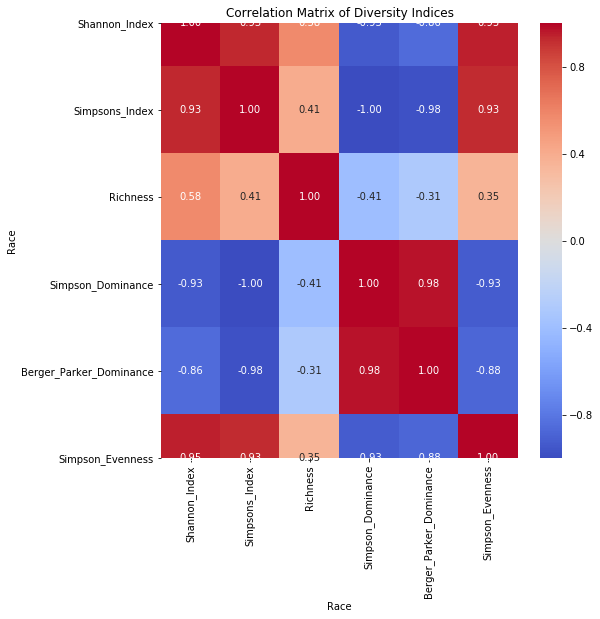

In [41]:
# correlation matrix
correlation_matrix = block_group_level[['Shannon_Index', 'Simpsons_Index', 'Richness', 
                                 'Simpson_Dominance', 'Berger_Parker_Dominance', 
                                 'Simpson_Evenness']].corr()

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diversity Indices')
plt.show()


* Strong positive correlations for simpsons and shannon index
* String positive correlations for berger parker dominance and simpsons dominance and strong negative correlations with shannon and simpson indexes 

But we will not drop these now as we can use them for calculating dominant races.

In [42]:
# reset index

block_group_level_df = block_group_level.reset_index()



In [43]:
#check sample
block_group_level_df.head()

Race,geo_id,Hispanic or Latino,asian,black,native,other,pac_isl,two or more races,white,Total_Population,Shannon_Index,Simpsons_Index,Richness,Simpson_Dominance,Berger_Parker_Dominance,Simpson_Evenness
0,1500000US290019501001,5,0,0,0,6,0,14,1096,1121,0.128924,0.043901,4,0.956099,0.977698,0.058535
1,1500000US290019501002,0,7,0,0,0,0,20,1562,1589,0.095813,0.033517,3,0.966483,0.983008,0.050276
2,1500000US290019501003,129,0,1,3,0,0,3,825,961,0.443730,0.244971,5,0.755029,0.858481,0.306214
3,1500000US290019502001,57,13,0,0,0,13,28,920,1031,0.469935,0.199622,5,0.800378,0.892338,0.249527
4,1500000US290019502002,0,0,0,0,0,0,19,979,998,0.094271,0.037351,2,0.962649,0.980962,0.074703


In [44]:
#round data to 3 decimal points and check sample
block_group_level_df.iloc[:, 10:] = block_group_level_df.iloc[:, 10:].round(3)
block_group_level_df.head()

Race,geo_id,Hispanic or Latino,asian,black,native,other,pac_isl,two or more races,white,Total_Population,Shannon_Index,Simpsons_Index,Richness,Simpson_Dominance,Berger_Parker_Dominance,Simpson_Evenness
0,1500000US290019501001,5,0,0,0,6,0,14,1096,1121,0.129,0.044,4,0.956,0.978,0.059
1,1500000US290019501002,0,7,0,0,0,0,20,1562,1589,0.096,0.034,3,0.966,0.983,0.050
2,1500000US290019501003,129,0,1,3,0,0,3,825,961,0.444,0.245,5,0.755,0.858,0.306
3,1500000US290019502001,57,13,0,0,0,13,28,920,1031,0.470,0.200,5,0.800,0.892,0.250
4,1500000US290019502002,0,0,0,0,0,0,19,979,998,0.094,0.037,2,0.963,0.981,0.075


In [45]:
#Add the column Year to add appropriate year back again
block_group_level_df['Year'] = 2022


In [46]:
#check sample
block_group_level_df.head()

Race,geo_id,Hispanic or Latino,asian,black,native,other,pac_isl,two or more races,white,Total_Population,Shannon_Index,Simpsons_Index,Richness,Simpson_Dominance,Berger_Parker_Dominance,Simpson_Evenness,Year
0,1500000US290019501001,5,0,0,0,6,0,14,1096,1121,0.129,0.044,4,0.956,0.978,0.059,2022
1,1500000US290019501002,0,7,0,0,0,0,20,1562,1589,0.096,0.034,3,0.966,0.983,0.050,2022
2,1500000US290019501003,129,0,1,3,0,0,3,825,961,0.444,0.245,5,0.755,0.858,0.306,2022
3,1500000US290019502001,57,13,0,0,0,13,28,920,1031,0.470,0.200,5,0.800,0.892,0.250,2022
4,1500000US290019502002,0,0,0,0,0,0,19,979,998,0.094,0.037,2,0.963,0.981,0.075,2022


In [47]:
#Now we have to merge these datasets
result_df = pd.merge(
    block_group_level_df,
    merged_df[['geo_id', 'block_group', 'census_tract', 'county', 'state']],
    on='geo_id',
    how='left'  
)

# Display the result

result_df.head()

,geo_id,Hispanic or Latino,asian,black,native,other,pac_isl,two or more races,white,Total_Population,...,Simpsons_Index,Richness,Simpson_Dominance,Berger_Parker_Dominance,Simpson_Evenness,Year,block_group,census_tract,county,state
0,1500000US290019501001,5,0,0,0,6,0,14,1096,1121,...,0.044,4,0.956,0.978,0.059,2022,Block Group 1,Census Tract 9501,Adair County,Missouri
1,1500000US290019501002,0,7,0,0,0,0,20,1562,1589,...,0.034,3,0.966,0.983,0.050,2022,Block Group 2,Census Tract 9501,Adair County,Missouri
2,1500000US290019501003,129,0,1,3,0,0,3,825,961,...,0.245,5,0.755,0.858,0.306,2022,Block Group 3,Census Tract 9501,Adair County,Missouri
3,1500000US290019502001,57,13,0,0,0,13,28,920,1031,...,0.200,5,0.800,0.892,0.250,2022,Block Group 1,Census Tract 9502,Adair County,Missouri
4,1500000US290019502002,0,0,0,0,0,0,19,979,998,...,0.037,2,0.963,0.981,0.075,2022,Block Group 2,Census Tract 9502,Adair County,Missouri


In [48]:
#replace space with hyphens to load in table
result_df.columns = [col.lower().replace(" ", "_") for col in result_df.columns]

# Check the updated columns
print(result_df.columns)

Index(['geo_id', 'hispanic_or_latino', 'asian', 'black', 'native', 'other',
       'pac_isl', 'two_or_more_races', 'white', 'total_population',
       'shannon_index', 'simpsons_index', 'richness', 'simpson_dominance',
       'berger_parker_dominance', 'simpson_evenness', 'year', 'block_group',
       'census_tract', 'county', 'state'],
      dtype='object')


In [ ]:
#Create Table

mypasswd = getpass.getpass("Enter your database password: ")

# Database connection details
database = "f24t03"
user = "jsmm8"
password = mypasswd
host = "pgsql"

# Create a connection to the database using SQLAlchemy for easier inserts
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{database}')

# Connect and create/drop the table, then insert data in chunks
try:
    # Connect to the database
    conn = psycopg2.connect(database=database, user=user, host=host, password=password)
    cursor = conn.cursor()
    print("Connected to the database.")

    # Drop the staging_race_data table if it exists
    cursor.execute("DROP TABLE IF EXISTS staging_race_data;")
    print("Dropped the staging_race_data table if it existed.")

    # Create the staging_race_data table
    create_table_query = """
CREATE TABLE staging_race_data (
    geo_id TEXT NOT NULL,
    hispanic_or_latino INTEGER NOT NULL,
    asian INTEGER NOT NULL,
    black INTEGER NOT NULL,
    native INTEGER NOT NULL,
    other INTEGER NOT NULL,
    pac_isl INTEGER NOT NULL,
    two_or_more_races INTEGER NOT NULL,
    white INTEGER NOT NULL,
    total_population INTEGER NOT NULL,
    shannon_index FLOAT8 NOT NULL,
    simpsons_index FLOAT8 NOT NULL,
    richness INTEGER NOT NULL,
    simpson_dominance FLOAT8 NOT NULL,
    berger_parker_dominance FLOAT8 NOT NULL,
    simpson_evenness FLOAT8 NOT NULL,
    year INTEGER NOT NULL,
    block_group TEXT NOT NULL,
    census_tract TEXT NOT NULL,
    county TEXT NOT NULL,
    state TEXT NOT NULL,
    PRIMARY KEY (geo_id, year)
);
    """
    cursor.execute(create_table_query)
    conn.commit()
    print("Created the staging_race_data table.")

    # Insert data from result_df in chunks
    chunk_size = 500
    for start in range(0, len(result_df), chunk_size):
        chunk = result_df.iloc[start:start + chunk_size]
        chunk.to_sql('staging_race_data', engine, if_exists='append', index=False)
        print(f"Uploaded a chunk of {len(chunk)} records to the staging_race_data table.")

    print("Data uploaded successfully.")

    # Query the inserted data to confirm
    query = "SELECT * FROM staging_race_data;"
    df = pd.read_sql(query, conn)
    print("Data extracted successfully! DataFrame shape:", df.shape)

except Exception as e:
    print("An error occurred:", e)

finally:
    # close cursor and connection
    if cursor:
        cursor.close()
    if conn:
        conn.close()


Enter your database password: ········
Connected to the database.
Dropped the staging_race_data table if it existed.
Created the staging_race_data table.
Uploaded a chunk of 500 records to the staging_race_data table.
Uploaded a chunk of 500 records to the staging_race_data table.
Uploaded a chunk of 500 records to the staging_race_data table.
Uploaded a chunk of 500 records to the staging_race_data table.
Uploaded a chunk of 500 records to the staging_race_data table.
Uploaded a chunk of 500 records to the staging_race_data table.
Uploaded a chunk of 500 records to the staging_race_data table.
Uploaded a chunk of 500 records to the staging_race_data table.
Uploaded a chunk of 500 records to the staging_race_data table.
Uploaded a chunk of 500 records to the staging_race_data table.
Uploaded a chunk of 31 records to the staging_race_data table.
Data uploaded successfully.
Data extracted successfully! DataFrame shape: (5031, 21)


In [50]:
df.head()

,geo_id,hispanic_or_latino,asian,black,native,other,pac_isl,two_or_more_races,white,total_population,...,simpsons_index,richness,simpson_dominance,berger_parker_dominance,simpson_evenness,year,block_group,census_tract,county,state
0,1500000US290019501001,5,0,0,0,6,0,14,1096,1121,...,0.044,4,0.956,0.978,0.059,2022,Block Group 1,Census Tract 9501,Adair County,Missouri
1,1500000US290019501002,0,7,0,0,0,0,20,1562,1589,...,0.034,3,0.966,0.983,0.050,2022,Block Group 2,Census Tract 9501,Adair County,Missouri
2,1500000US290019501003,129,0,1,3,0,0,3,825,961,...,0.245,5,0.755,0.858,0.306,2022,Block Group 3,Census Tract 9501,Adair County,Missouri
3,1500000US290019502001,57,13,0,0,0,13,28,920,1031,...,0.200,5,0.800,0.892,0.250,2022,Block Group 1,Census Tract 9502,Adair County,Missouri
4,1500000US290019502002,0,0,0,0,0,0,19,979,998,...,0.037,2,0.963,0.981,0.075,2022,Block Group 2,Census Tract 9502,Adair County,Missouri


In [51]:
##Now repeat same steps for 2021

columns_to_drop = [col for col in df_2021.columns if 'moe_' in col]

df_cleaned = df_2021.drop(columns=columns_to_drop)

df_2021 = df_cleaned.drop('est_total',axis = 1)

not_hispanic_columns = [col for col in df_2021.columns if 'est_non_his_' in col]


first_five_columns = df_2021.columns[:5]


all_columns = list(first_five_columns) + not_hispanic_columns


df_not_hispanic = df_2021[all_columns]
df_not_hispanic.columns = [col.replace('est_non_his_lat_', '') for col in df_not_hispanic.columns]

df_not_hispanic = df_not_hispanic.drop('est_non_his_lat',axis = 1)
df_not_hispanic = df_not_hispanic.drop('multi',axis = 1)

columns_hispanic = [col for col in df_2021.columns if col not in not_hispanic_columns]


df_hispanic = df_2021[columns_hispanic]

df_hispanic.columns = [col.replace('est_his_lat_', 'drop') for col in df_hispanic.columns]
columns_to_drop = [col for col in df_hispanic.columns if 'drop' in col]


df_hispanic = df_hispanic.drop(columns=columns_to_drop)
df_hispanic.rename(columns={'est_his_lat': 'Hispanic or Latino'}, inplace=True)

merged_df = pd.merge(df_not_hispanic, df_hispanic, 
                     on='geo_id', 
                     how='inner')

merged_df.drop(columns=['block_group_y','census_tract_y','county_y','state_y','year'], inplace=True)

merged_df.rename(columns={'block_group_x': 'block_group'}, inplace=True)
merged_df.rename(columns={'census_tract_x': 'census_tract'}, inplace=True)
merged_df.rename(columns={'county_x': 'county'}, inplace=True)
merged_df.rename(columns={'state_x': 'state'}, inplace=True)

col1 = 'multi_excl_other'
col2 = 'multi_other'


merged_df['two or more races'] = merged_df[col1] + merged_df[col2]


merged_df.drop(columns=[col1, col2], inplace=True)


merged_df_melted = merged_df.melt(
    id_vars=['geo_id', 'block_group','census_tract','county','state'],
    var_name='Race',
    value_name='Population count'
)

merged_df_melted = merged_df_melted.drop(['state', 'block_group','census_tract','county'],axis =1)
block_group_level = merged_df_melted.groupby(['geo_id','Race'])['Population count'].sum().unstack(fill_value=0)
block_group_level['Total_Population'] = block_group_level.sum(axis=1)


block_group_level['Shannon_Index'] = block_group_level.drop(columns=['Total_Population']).apply(shannon_diversity_index, axis=1)
block_group_level['Simpsons_Index'] = block_group_level.drop(columns=['Total_Population','Shannon_Index']).apply(simpsons_diversity_index, axis=1)
block_group_level['Richness'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index']).apply(richness_index, axis=1)
block_group_level['Simpson_Dominance'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness']).apply(simpsons_dominance_index, axis=1)
block_group_level['Berger_Parker_Dominance'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness','Simpson_Dominance']).apply(berger_parker_dominance, axis=1)
block_group_level['Simpson_Evenness'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness','Simpson_Dominance','Berger_Parker_Dominance']).apply(simpson_evenness_index, axis=1)

block_group_level_df = block_group_level.reset_index()

block_group_level_df.iloc[:, 10:] = block_group_level_df.iloc[:, 10:].round(3)

block_group_level_df['Year'] = 2021

result_df = pd.merge(
    block_group_level_df,
    merged_df[['geo_id', 'block_group', 'census_tract', 'county', 'state']],
    on='geo_id',
    how='left'  
)



In [ ]:
# Establish the database connection and load 2021 data
conn = psycopg2.connect(
database = "f24t03",
user = "jsmm8",
password = mypasswd,
host = "pgsql"
)
cursor = conn.cursor()

result_df.columns = [col.lower().replace(" ", "_") for col in result_df.columns]

# Insert the new data into the staging_race_data table
for index, row in result_df.iterrows():
    insert_query = """
        INSERT INTO staging_race_data (
            geo_id, hispanic_or_latino, asian, black, native, other, pac_isl,
            two_or_more_races, white, total_population, shannon_index, 
            simpsons_index, richness, simpson_dominance, berger_parker_dominance,
            simpson_evenness, year, block_group, census_tract, county, state
        )
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ON CONFLICT (geo_id, year) DO NOTHING;
    """
    values = (
        row['geo_id'], row['hispanic_or_latino'], row['asian'], row['black'], row['native'],
        row['other'], row['pac_isl'], row['two_or_more_races'], row['white'], row['total_population'],
        row['shannon_index'], row['simpsons_index'], row['richness'], row['simpson_dominance'],
        row['berger_parker_dominance'], row['simpson_evenness'], row['year'], row['block_group'],
        row['census_tract'], row['county'], row['state']
    )
    
    # Execute the insert query
    cursor.execute(insert_query, values)

# Commit the transaction
conn.commit()

# Close the connection
cursor.close()
conn.close()

print("New data inserted successfully!")

New data inserted successfully!


In [53]:
##Now repeat same steps for 2020

columns_to_drop = [col for col in df_2020.columns if 'moe_' in col]

df_cleaned = df_2020.drop(columns=columns_to_drop)

df_2020 = df_cleaned.drop('est_total',axis = 1)

not_hispanic_columns = [col for col in df_2020.columns if 'est_non_his_' in col]


first_five_columns = df_2020.columns[:5]


all_columns = list(first_five_columns) + not_hispanic_columns


df_not_hispanic = df_2020[all_columns]
df_not_hispanic.columns = [col.replace('est_non_his_lat_', '') for col in df_not_hispanic.columns]

df_not_hispanic = df_not_hispanic.drop('est_non_his_lat',axis = 1)
df_not_hispanic = df_not_hispanic.drop('multi',axis = 1)

columns_hispanic = [col for col in df_2020.columns if col not in not_hispanic_columns]


df_hispanic = df_2020[columns_hispanic]

df_hispanic.columns = [col.replace('est_his_lat_', 'drop') for col in df_hispanic.columns]
columns_to_drop = [col for col in df_hispanic.columns if 'drop' in col]


df_hispanic = df_hispanic.drop(columns=columns_to_drop)
df_hispanic.rename(columns={'est_his_lat': 'Hispanic or Latino'}, inplace=True)

merged_df = pd.merge(df_not_hispanic, df_hispanic, 
                     on='geo_id',  
                     how='inner')

merged_df.drop(columns=['block_group_y','census_tract_y','county_y','state_y','year'], inplace=True)


merged_df.rename(columns={'block_group_x': 'block_group'}, inplace=True)
merged_df.rename(columns={'census_tract_x': 'census_tract'}, inplace=True)
merged_df.rename(columns={'county_x': 'county'}, inplace=True)
merged_df.rename(columns={'state_x': 'state'}, inplace=True)

col1 = 'multi_excl_other'
col2 = 'multi_other'


merged_df['two or more races'] = merged_df[col1] + merged_df[col2]


merged_df.drop(columns=[col1, col2], inplace=True)


merged_df_melted = merged_df.melt(
    id_vars=['geo_id', 'block_group','census_tract','county','state'],
    var_name='Race',
    value_name='Population count'
)

merged_df_melted = merged_df_melted.drop(['state', 'block_group','census_tract','county'],axis =1)
block_group_level = merged_df_melted.groupby(['geo_id','Race'])['Population count'].sum().unstack(fill_value=0)
block_group_level['Total_Population'] = block_group_level.sum(axis=1)


block_group_level['Shannon_Index'] = block_group_level.drop(columns=['Total_Population']).apply(shannon_diversity_index, axis=1)
block_group_level['Simpsons_Index'] = block_group_level.drop(columns=['Total_Population','Shannon_Index']).apply(simpsons_diversity_index, axis=1)
block_group_level['Richness'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index']).apply(richness_index, axis=1)
block_group_level['Simpson_Dominance'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness']).apply(simpsons_dominance_index, axis=1)
block_group_level['Berger_Parker_Dominance'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness','Simpson_Dominance']).apply(berger_parker_dominance, axis=1)
block_group_level['Simpson_Evenness'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness','Simpson_Dominance','Berger_Parker_Dominance']).apply(simpson_evenness_index, axis=1)




block_group_level_df = block_group_level.reset_index()



block_group_level_df.iloc[:, 10:] = block_group_level_df.iloc[:, 10:].round(3)

block_group_level_df['Year'] = 2020



result_df = pd.merge(
    block_group_level_df,
    merged_df[['geo_id', 'block_group', 'census_tract', 'county', 'state']],
    on='geo_id',
    how='left' 
)



In [ ]:
# Establish the database connection and load 2020 data
conn = psycopg2.connect(
database = "f24t03",
user = "jsmm8",
password = mypasswd,
host = "pgsql"
)
cursor = conn.cursor()

result_df.columns = [col.lower().replace(" ", "_") for col in result_df.columns]

# Insert the new data into the staging_race_data table
for index, row in result_df.iterrows():
    insert_query = """
        INSERT INTO staging_race_data (
            geo_id, hispanic_or_latino, asian, black, native, other, pac_isl,
            two_or_more_races, white, total_population, shannon_index, 
            simpsons_index, richness, simpson_dominance, berger_parker_dominance,
            simpson_evenness, year, block_group, census_tract, county, state
        )
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ON CONFLICT (geo_id, year) DO NOTHING;
    """
    values = (
        row['geo_id'], row['hispanic_or_latino'], row['asian'], row['black'], row['native'],
        row['other'], row['pac_isl'], row['two_or_more_races'], row['white'], row['total_population'],
        row['shannon_index'], row['simpsons_index'], row['richness'], row['simpson_dominance'],
        row['berger_parker_dominance'], row['simpson_evenness'], row['year'], row['block_group'],
        row['census_tract'], row['county'], row['state']
    )
    
    # Execute the insert query
    cursor.execute(insert_query, values)

# Commit the transaction
conn.commit()

# Close the connection
cursor.close()
conn.close()

print("New data inserted successfully!")

New data inserted successfully!


In [55]:
##Now repeat same steps for 2019


columns_to_drop = [col for col in df_2019.columns if 'moe_' in col]

df_cleaned = df_2019.drop(columns=columns_to_drop)

df_2019 = df_cleaned.drop('est_total',axis = 1)

not_hispanic_columns = [col for col in df_2019.columns if 'est_non_his_' in col]


first_five_columns = df_2019.columns[:5]


all_columns = list(first_five_columns) + not_hispanic_columns


df_not_hispanic = df_2019[all_columns]
df_not_hispanic.columns = [col.replace('est_non_his_lat_', '') for col in df_not_hispanic.columns]

df_not_hispanic = df_not_hispanic.drop('est_non_his_lat',axis = 1)
df_not_hispanic = df_not_hispanic.drop('multi',axis = 1)

columns_hispanic = [col for col in df_2019.columns if col not in not_hispanic_columns]


df_hispanic = df_2019[columns_hispanic]

df_hispanic.columns = [col.replace('est_his_lat_', 'drop') for col in df_hispanic.columns]
columns_to_drop = [col for col in df_hispanic.columns if 'drop' in col]


df_hispanic = df_hispanic.drop(columns=columns_to_drop)
df_hispanic.rename(columns={'est_his_lat': 'Hispanic or Latino'}, inplace=True)

merged_df = pd.merge(df_not_hispanic, df_hispanic, 
                     on='geo_id',  
                     how='inner')

merged_df.drop(columns=['block_group_y','census_tract_y','county_y','state_y','year'], inplace=True)


merged_df.rename(columns={'block_group_x': 'block_group'}, inplace=True)
merged_df.rename(columns={'census_tract_x': 'census_tract'}, inplace=True)
merged_df.rename(columns={'county_x': 'county'}, inplace=True)
merged_df.rename(columns={'state_x': 'state'}, inplace=True)

col1 = 'multi_excl_other'
col2 = 'multi_other'


merged_df['two or more races'] = merged_df[col1] + merged_df[col2]

 
merged_df.drop(columns=[col1, col2], inplace=True)


merged_df_melted = merged_df.melt(
    id_vars=['geo_id', 'block_group','census_tract','county','state'],
    var_name='Race',
    value_name='Population count'
)

merged_df_melted = merged_df_melted.drop(['state', 'block_group','census_tract','county'],axis =1)
block_group_level = merged_df_melted.groupby(['geo_id','Race'])['Population count'].sum().unstack(fill_value=0)
block_group_level['Total_Population'] = block_group_level.sum(axis=1)


block_group_level['Shannon_Index'] = block_group_level.drop(columns=['Total_Population']).apply(shannon_diversity_index, axis=1)
block_group_level['Simpsons_Index'] = block_group_level.drop(columns=['Total_Population','Shannon_Index']).apply(simpsons_diversity_index, axis=1)
block_group_level['Richness'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index']).apply(richness_index, axis=1)
block_group_level['Simpson_Dominance'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness']).apply(simpsons_dominance_index, axis=1)
block_group_level['Berger_Parker_Dominance'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness','Simpson_Dominance']).apply(berger_parker_dominance, axis=1)
block_group_level['Simpson_Evenness'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness','Simpson_Dominance','Berger_Parker_Dominance']).apply(simpson_evenness_index, axis=1)


block_group_level_df = block_group_level.reset_index()



block_group_level_df.iloc[:, 10:] = block_group_level_df.iloc[:, 10:].round(3)

block_group_level_df['Year'] = 2019



result_df = pd.merge(
    block_group_level_df,
    merged_df[['geo_id', 'block_group', 'census_tract', 'county', 'state']],
    on='geo_id',
    how='left'  
)



In [ ]:
# Establish the database connection and load 2019 data
conn = psycopg2.connect(
database = "f24t03",
user = "jsmm8",
password = mypasswd,
host = "pgsql"
)
cursor = conn.cursor()

result_df.columns = [col.lower().replace(" ", "_") for col in result_df.columns]

# Insert the new data into the staging_race_data table
for index, row in result_df.iterrows():
    insert_query = """
        INSERT INTO staging_race_data (
            geo_id, hispanic_or_latino, asian, black, native, other, pac_isl,
            two_or_more_races, white, total_population, shannon_index, 
            simpsons_index, richness, simpson_dominance, berger_parker_dominance,
            simpson_evenness, year, block_group, census_tract, county, state
        )
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ON CONFLICT (geo_id, year) DO NOTHING;
    """
    values = (
        row['geo_id'], row['hispanic_or_latino'], row['asian'], row['black'], row['native'],
        row['other'], row['pac_isl'], row['two_or_more_races'], row['white'], row['total_population'],
        row['shannon_index'], row['simpsons_index'], row['richness'], row['simpson_dominance'],
        row['berger_parker_dominance'], row['simpson_evenness'], row['year'], row['block_group'],
        row['census_tract'], row['county'], row['state']
    )
    
    # Execute the insert query
    cursor.execute(insert_query, values)

# Commit the transaction
conn.commit()

# Close the connection
cursor.close()
conn.close()

print("New data inserted successfully!")

New data inserted successfully!


In [57]:
##Now repeat same steps for 2018


columns_to_drop = [col for col in df_2018.columns if 'moe_' in col]

df_cleaned = df_2018.drop(columns=columns_to_drop)

df_2018 = df_cleaned.drop('est_total',axis = 1)

not_hispanic_columns = [col for col in df_2018.columns if 'est_non_his_' in col]


first_five_columns = df_2018.columns[:5]


all_columns = list(first_five_columns) + not_hispanic_columns


df_not_hispanic = df_2018[all_columns]
df_not_hispanic.columns = [col.replace('est_non_his_lat_', '') for col in df_not_hispanic.columns]

df_not_hispanic = df_not_hispanic.drop('est_non_his_lat',axis = 1)
df_not_hispanic = df_not_hispanic.drop('multi',axis = 1)

columns_hispanic = [col for col in df_2018.columns if col not in not_hispanic_columns]


df_hispanic = df_2018[columns_hispanic]

df_hispanic.columns = [col.replace('est_his_lat_', 'drop') for col in df_hispanic.columns]
columns_to_drop = [col for col in df_hispanic.columns if 'drop' in col]


df_hispanic = df_hispanic.drop(columns=columns_to_drop)
df_hispanic.rename(columns={'est_his_lat': 'Hispanic or Latino'}, inplace=True)

merged_df = pd.merge(df_not_hispanic, df_hispanic, 
                     on='geo_id',  
                     how='inner')

merged_df.drop(columns=['block_group_y','census_tract_y','county_y','state_y','year'], inplace=True)


merged_df.rename(columns={'block_group_x': 'block_group'}, inplace=True)
merged_df.rename(columns={'census_tract_x': 'census_tract'}, inplace=True)
merged_df.rename(columns={'county_x': 'county'}, inplace=True)
merged_df.rename(columns={'state_x': 'state'}, inplace=True)

col1 = 'multi_excl_other'
col2 = 'multi_other'


merged_df['two or more races'] = merged_df[col1] + merged_df[col2]


merged_df.drop(columns=[col1, col2], inplace=True)


merged_df_melted = merged_df.melt(
    id_vars=['geo_id', 'block_group','census_tract','county','state'],
    var_name='Race',
    value_name='Population count'
)

merged_df_melted = merged_df_melted.drop(['state', 'block_group','census_tract','county'],axis =1)
block_group_level = merged_df_melted.groupby(['geo_id','Race'])['Population count'].sum().unstack(fill_value=0)
block_group_level['Total_Population'] = block_group_level.sum(axis=1)


block_group_level['Shannon_Index'] = block_group_level.drop(columns=['Total_Population']).apply(shannon_diversity_index, axis=1)
block_group_level['Simpsons_Index'] = block_group_level.drop(columns=['Total_Population','Shannon_Index']).apply(simpsons_diversity_index, axis=1)
block_group_level['Richness'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index']).apply(richness_index, axis=1)
block_group_level['Simpson_Dominance'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness']).apply(simpsons_dominance_index, axis=1)
block_group_level['Berger_Parker_Dominance'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness','Simpson_Dominance']).apply(berger_parker_dominance, axis=1)
block_group_level['Simpson_Evenness'] = block_group_level.drop(columns=['Total_Population','Simpsons_Index','Shannon_Index','Richness','Simpson_Dominance','Berger_Parker_Dominance']).apply(simpson_evenness_index, axis=1)




block_group_level_df = block_group_level.reset_index()



block_group_level_df.iloc[:, 10:] = block_group_level_df.iloc[:, 10:].round(3)

block_group_level_df['Year'] = 2018


result_df = pd.merge(
    block_group_level_df,
    merged_df[['geo_id', 'block_group', 'census_tract', 'county', 'state']],
    on='geo_id',
    how='left'  
)



In [ ]:
# Establish the database connection and load 2018 data
conn = psycopg2.connect(
database = "f24t03",
user = "jsmm8",
password = mypasswd,
host = "pgsql"
)
cursor = conn.cursor()

result_df.columns = [col.lower().replace(" ", "_") for col in result_df.columns]

# Insert the new data into the staging_race_data table
for index, row in result_df.iterrows():
    insert_query = """
        INSERT INTO staging_race_data (
            geo_id, hispanic_or_latino, asian, black, native, other, pac_isl,
            two_or_more_races, white, total_population, shannon_index, 
            simpsons_index, richness, simpson_dominance, berger_parker_dominance,
            simpson_evenness, year, block_group, census_tract, county, state
        )
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ON CONFLICT (geo_id, year) DO NOTHING;
    """
    values = (
        row['geo_id'], row['hispanic_or_latino'], row['asian'], row['black'], row['native'],
        row['other'], row['pac_isl'], row['two_or_more_races'], row['white'], row['total_population'],
        row['shannon_index'], row['simpsons_index'], row['richness'], row['simpson_dominance'],
        row['berger_parker_dominance'], row['simpson_evenness'], row['year'], row['block_group'],
        row['census_tract'], row['county'], row['state']
    )
    
    # Execute the insert query
    cursor.execute(insert_query, values)

# Commit the transaction
conn.commit()

# Close the connection
cursor.close()
conn.close()

print("New data inserted successfully!")

New data inserted successfully!


In [ ]:
#Create the connection and extract data from 'staging_race_data' table
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the staging_race_data table
query = "SELECT * FROM staging_race_data;"

try:
    df = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df.shape

I am able to connect to the database
Data extracted successfully!


(24105, 21)

# Create Dominant Race Fields(Group Classifications)

In [60]:
# Define the quantiles 
quantiles = [0.25, 0.5, 0.75]

# Calculate quantiles for each column separately and combine the results
quartile_stats = pd.concat([ 
    df.groupby('year')['simpson_dominance'].quantile(quantiles).unstack().rename(columns={0.25: 'q1', 0.5: 'q2', 0.75: 'q3'}), 
    df.groupby('year')['simpson_evenness'].quantile(quantiles).unstack().rename(columns={0.25: 'q1', 0.5: 'q2', 0.75: 'q3'}), 
    df.groupby('year')['shannon_index'].quantile(quantiles).unstack().rename(columns={0.25: 'q1', 0.5: 'q2', 0.75: 'q3'}) 
], axis=1, keys=['simpson_dominance', 'simpson_evenness', 'shannon_index'])

# Display the result
quartile_stats

simpson_dominance                simpson_evenness                  \
                    q1      q2     q3               q1      q2      q3   
year                                                                     
2018             0.642  0.8165  0.923           0.1140  0.2480  0.4760   
2019             0.632  0.8120  0.919           0.1200  0.2565  0.4880   
2020             0.620  0.8020  0.914           0.1250  0.2750  0.5115   
2021             0.609  0.7880  0.902           0.1415  0.2910  0.5250   
2022             0.593  0.7760  0.890           0.1575  0.3070  0.5345   

     shannon_index                
                q1     q2     q3  
year                              
2018       0.18625  0.399  0.689  
2019       0.19700  0.410  0.698  
2020       0.20500  0.415  0.705  
2021       0.22800  0.446  0.727  
2022       0.25200  0.464  0.762

In [61]:
# Quartile statistics 
quartile_stats = pd.DataFrame(quartile_stats)

#Function to calculate noise based on thresholds
def calculate_noise(q1, q3, percentage=0.005):  # add 0.5% of the range as noise for the limit to make sure the limits are not exact
    return (q3 - q1) * percentage

# Function to classify groups based on thresholds with noise
def classify_group(row):
    # Check if total_population is 0
    if row['total_population'] == 0:
        return 'Undetermined'
    
    year = row['year']
    thresholds = quartile_stats.loc[year]

    # Calculate noise for each metric
    dominance_noise = calculate_noise(thresholds[('simpson_dominance', 'q1')], 
                                       thresholds[('simpson_dominance', 'q3')])
    evenness_noise = calculate_noise(thresholds[('simpson_evenness', 'q1')], 
                                      thresholds[('simpson_evenness', 'q3')])
    shannon_noise = calculate_noise(thresholds[('shannon_index', 'q1')], 
                                     thresholds[('shannon_index', 'q3')])

    # Define thresholds with noise
    dominant_dominance_threshold = thresholds[('simpson_dominance', 'q3')] + dominance_noise
    dominant_evenness_threshold = thresholds[('simpson_evenness', 'q1')] - evenness_noise
    dominant_shannon_threshold = thresholds[('shannon_index', 'q1')] - shannon_noise

    non_dominant_dominance_threshold = thresholds[('simpson_dominance', 'q1')] - dominance_noise
    non_dominant_evenness_threshold = thresholds[('simpson_evenness', 'q3')] + evenness_noise
    non_dominant_shannon_threshold = thresholds[('shannon_index', 'q3')] + shannon_noise

    # Classification logic with noise
    if (row['simpson_dominance'] > dominant_dominance_threshold and 
        row['simpson_evenness'] < dominant_evenness_threshold and 
        row['shannon_index'] < dominant_shannon_threshold):
        return 'Dominant Race Group'
    
    elif (row['simpson_dominance'] < non_dominant_dominance_threshold and 
          row['simpson_evenness'] > non_dominant_evenness_threshold and 
          row['shannon_index'] > non_dominant_shannon_threshold):
        return 'Non-Dominant Race Group'
    
    return 'Undetermined'

# Apply classification group function and create a new column
df['group_classification'] = df.apply(classify_group, axis=1)


In [62]:
#Check structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24105 entries, 0 to 24104
Data columns (total 22 columns):
geo_id                     24105 non-null object
hispanic_or_latino         24105 non-null int64
asian                      24105 non-null int64
black                      24105 non-null int64
native                     24105 non-null int64
other                      24105 non-null int64
pac_isl                    24105 non-null int64
two_or_more_races          24105 non-null int64
white                      24105 non-null int64
total_population           24105 non-null int64
shannon_index              24105 non-null float64
simpsons_index             24105 non-null float64
richness                   24105 non-null int64
simpson_dominance          24105 non-null float64
berger_parker_dominance    24105 non-null float64
simpson_evenness           24105 non-null float64
year                       24105 non-null int64
block_group                24105 non-null object
census_tract   

In [63]:
# Get the count of 'Group_Classification' values within each year
yearly_counts = df.groupby('year')['group_classification'].value_counts().unstack(fill_value=0)

yearly_counts


group_classification,Dominant Race Group,Non-Dominant Race Group,Undetermined
year,,,
2018,1002,973,2531
2019,1004,954,2548
2020,1105,1061,2865
2021,1096,1036,2899
2022,1086,1054,2891


In [64]:
#Now create appropriate categories for available races 
def get_dominant_race(row):
    race_columns = ['hispanic_or_latino', 
    'asian', 
    'black', 
    'native', 
    'other', 
    'pac_isl', 
    'two_or_more_races', 
    'white']
    
    # change the values in race columns are numeric
    race_values = pd.to_numeric(row[race_columns], errors='raise').fillna(0)  # Convert to numeric and replace non-numeric with 0
    
    # If all race counts are zero, return 'Undetermined'
    if (race_values == 0).all():
        return 'Undetermined'
    
    # Find the race column with the maximum population count
    dominant_race = race_values.idxmax()  # This returns the column name with the max value
    return dominant_race

# Apply the function to create a new column 'Dominant_Race'
df['Dominant_Race'] = df.apply(lambda row: get_dominant_race(row) if row['group_classification'] == 'Dominant Race Group' else None, axis=1)

# Display the updated dataframe
print(df[['group_classification', 'Dominant_Race']].head())


  group_classification Dominant_Race
0  Dominant Race Group         white
1  Dominant Race Group         white
2         Undetermined          None
3         Undetermined          None
4  Dominant Race Group         white


In [65]:
# Get the count of 'Dominant_Race' values within each year again
yearly_counts = df.groupby('year')['Dominant_Race'].value_counts().unstack(fill_value=0)

yearly_counts


Dominant_Race,black,white
year,,
2018,88,914
2019,87,917
2020,82,1023
2021,88,1008
2022,82,1004


In [66]:
#Create groups within dominant race with low diversity (richness value < 4 as we have 8 race groups)

def categorize_dominant_race_with_low_diversity(row, proportion_threshold=0.5, richness_mean_threshold=4):
    # Apply categorization only to rows classified as 'Non-Dominant Race Group'
    if row['group_classification'] == 'Non-Dominant Race Group':
        # List of race columns
        race_columns = ['hispanic_or_latino', 
    'asian', 
    'black', 
    'native', 
    'other', 
    'pac_isl', 
    'two_or_more_races', 
    'white']
        
        # Calculate the total population for this row
        total_population = row['total_population']
        
        # Calculate the population proportion for each race
        race_proportions = {race: row[race] / total_population for race in race_columns}
        
        # Identify the race with the maximum proportion
        dominant_race = max(race_proportions, key=race_proportions.get)
        max_proportion = race_proportions[dominant_race]
        
        # Check if the dominant race exceeds the proportion threshold and if the Richness Index indicates low diversity
        if max_proportion > proportion_threshold and row['richness'] <= richness_mean_threshold:
            return f"{dominant_race} Dominant with low diversity"
    
    # Return None (no change) if it's not a 'Non-Dominant Race Group' or conditions aren't met
    return row['group_classification']

# Apply this function to the dataframe
df['group_classification'] = df.apply(categorize_dominant_race_with_low_diversity, axis=1)

# Display the updated classification
df[['geo_id', 'group_classification']].head()


,geo_id,group_classification
0,1500000US290019501001,Dominant Race Group
1,1500000US290019501002,Dominant Race Group
2,1500000US290019501003,Undetermined
3,1500000US290019502001,Undetermined
4,1500000US290019502002,Dominant Race Group


In [67]:
#Create groups within dominant race with high diversity (richness > 4)

def categorize_dominant_race_with_high_diversity(row, proportion_threshold=0.5, richness_mean_threshold=4):
    # Apply categorization only to rows classified as 'Non-Dominant Race Group'
    if row['group_classification'] == 'Non-Dominant Race Group':
        # List of race columns
        race_columns = ['hispanic_or_latino', 
    'asian', 
    'black', 
    'native', 
    'other', 
    'pac_isl', 
    'two_or_more_races', 
    'white']
        
        # Calculate the total population for this row
        total_population = row['total_population']
        
        # Calculate the population proportion for each race
        race_proportions = {race: row[race] / total_population for race in race_columns}
        
        # Identify the race with the maximum proportion
        dominant_race = max(race_proportions, key=race_proportions.get)
        max_proportion = race_proportions[dominant_race]
        
        # Check if the dominant race exceeds the proportion threshold and if the Richness Index indicates low diversity
        if max_proportion > proportion_threshold and row['richness'] > richness_mean_threshold:
            return f"{dominant_race} Dominant with high diversity"
    
    # Return None (no change) if it's not a 'Non-Dominant Race Group' or conditions aren't met
    return row['group_classification']

# Apply this function to the dataframe
df['group_classification'] = df.apply(categorize_dominant_race_with_high_diversity, axis=1)

# Display the updated classification
print(df[['geo_id', 'group_classification']].head())


                  geo_id group_classification
0  1500000US290019501001  Dominant Race Group
1  1500000US290019501002  Dominant Race Group
2  1500000US290019501003         Undetermined
3  1500000US290019502001         Undetermined
4  1500000US290019502002  Dominant Race Group


In [68]:
# Update 'Group_Classification' where Total_Population == 0 to 'No Population Exists'
df.loc[(df['group_classification'] == 'Undetermined') & (df['total_population'] == 0), 'group_classification'] = 'No Population Exists'


In [69]:
# Update the 'Group_Classification' column where it's 'Dominant Race Group'
df.loc[df['group_classification'] == 'Dominant Race Group', 'group_classification'] = df['Dominant_Race']


In [70]:
#drop dominant race group as it is no longer needed as i created all groups in group classification 
df = df.drop(columns=['Dominant_Race'])

In [71]:
# Get the count of 'Group_Classification' values within each year
yearly_counts = df.groupby('year')['group_classification'].value_counts().unstack(fill_value=0)

yearly_counts


group_classification,No Population Exists,Non-Dominant Race Group,Undetermined,asian Dominant with high diversity,asian Dominant with low diversity,black,black Dominant with high diversity,black Dominant with low diversity,hispanic_or_latino Dominant with high diversity,hispanic_or_latino Dominant with low diversity,native Dominant with low diversity,white,white Dominant with high diversity,white Dominant with low diversity
year,,,,,,,,,,,,,,
2018,7,152,2524,2,0,88,69,116,4,20,0,914,343,267
2019,7,162,2541,2,0,87,69,106,5,18,0,917,353,239
2020,17,191,2848,0,3,82,59,115,7,14,1,1023,347,324
2021,18,202,2881,0,1,88,59,101,7,15,0,1008,335,316
2022,19,203,2872,0,1,82,58,106,9,19,0,1004,370,288


In [72]:
#Now further categorize undetermined using berger parker dominance threshold of 0.6(This is chosen as more than 0.5 value is needed for dominance race)

def categorize_undetermined_race_with_diversity(row, richness_mean_threshold=4, berger_parker_threshold=0.6):
    # Skip rows with Total_Population as 0
    if row['total_population'] == 0:
        return row['group_classification']
    
    # Apply categorization to rows with 'Undetermined' classification
    if row['group_classification'] == 'Undetermined':
        # List of race columns
        race_columns = ['hispanic_or_latino', 
    'asian', 
    'black', 
    'native', 
    'other', 
    'pac_isl', 
    'two_or_more_races', 
    'white']
        
        # Calculate the total population for this row
        total_population = row['total_population']
        
        # Calculate the population for each race
        race_populations = {race: row[race] for race in race_columns}
        
        # Identify the race with the maximum population
        dominant_race = max(race_populations, key=race_populations.get)
        max_population = race_populations[dominant_race]
        
        # Retrieve Berger Parker Dominance from the dataframe column directly
        berger_parker = row['berger_parker_dominance']
        
        # Check if the Berger Parker Dominance exceeds the threshold and if the Richness Index indicates high diversity
        if berger_parker >= berger_parker_threshold and row['richness'] > richness_mean_threshold:
            return f"{dominant_race} Dominant with high diversity"
        elif berger_parker >= berger_parker_threshold and row['richness'] <= richness_mean_threshold:
            return f"{dominant_race} Dominant with low diversity"
    
    # Return the original classification if it's not 'Undetermined' or conditions aren't met
    return row['group_classification']

# Apply this function to the dataframe
df['group_classification'] = df.apply(categorize_undetermined_race_with_diversity, axis=1)

# Display the updated classification
print(df[['geo_id', 'group_classification']].head())


                  geo_id                group_classification
0  1500000US290019501001                               white
1  1500000US290019501002                               white
2  1500000US290019501003  white Dominant with high diversity
3  1500000US290019502001  white Dominant with high diversity
4  1500000US290019502002                               white


In [73]:
# Get the count of 'Group_Classification' values within each year
yearly_counts = df.groupby('year')['group_classification'].value_counts().unstack(fill_value=0)

yearly_counts


group_classification,No Population Exists,Non-Dominant Race Group,Undetermined,asian Dominant with high diversity,asian Dominant with low diversity,black,black Dominant with high diversity,black Dominant with low diversity,hispanic_or_latino Dominant with high diversity,hispanic_or_latino Dominant with low diversity,native Dominant with low diversity,pac_isl Dominant with low diversity,two_or_more_races Dominant with low diversity,white,white Dominant with high diversity,white Dominant with low diversity
year,,,,,,,,,,,,,,,,
2018,7,152,9,2,1,88,94,320,4,23,0,0,0,914,1227,1665
2019,7,162,12,2,1,87,98,307,5,22,0,0,0,917,1251,1635
2020,17,191,8,0,4,82,89,310,7,18,1,0,0,1023,1218,2063
2021,18,202,22,0,3,88,83,297,7,19,0,1,1,1008,1238,2044
2022,19,203,21,0,3,82,88,297,10,24,0,0,0,1004,1381,1899


In [74]:
#now within white and black do further categorization based on richness

def update_dominant_race_diversity(row):
    # Check if Group_Classification is 'white' or 'black'
    if row['group_classification'] in ['white', 'black']:
        # Check Richness Index and update the classification
        if row['richness'] <= 4:
            return f"{row['group_classification']} Dominant with low diversity"
        elif row['richness'] > 4:
            return f"{row['group_classification']} Dominant with high diversity"
    
    # If not 'white' or 'black', return the original Group_Classification
    return row['group_classification']

# Apply the function to the dataframe
df['group_classification'] = df.apply(update_dominant_race_diversity, axis=1)

# Display the updated classification
print(df[['geo_id', 'group_classification']].head())


                  geo_id                group_classification
0  1500000US290019501001   white Dominant with low diversity
1  1500000US290019501002   white Dominant with low diversity
2  1500000US290019501003  white Dominant with high diversity
3  1500000US290019502001  white Dominant with high diversity
4  1500000US290019502002   white Dominant with low diversity


In [75]:
#Change non dominant race groups to Mixed race dominant as we have high diversity in these
df['group_classification'] = df['group_classification'].replace('Non-Dominant Race Group', 'Mixed Race Dominant')

In [76]:
#Change Undetermined groups to Mixed race dominant as we have high diversity in these
df['group_classification'] = df['group_classification'].replace('Undetermined', 'Mixed Race Dominant')

In [77]:
# Get the count of 'Group_Classification' values within each year
yearly_counts = df.groupby('year')['group_classification'].value_counts().unstack(fill_value=0)

#check counts
yearly_counts


group_classification,Mixed Race Dominant,No Population Exists,asian Dominant with high diversity,asian Dominant with low diversity,black Dominant with high diversity,black Dominant with low diversity,hispanic_or_latino Dominant with high diversity,hispanic_or_latino Dominant with low diversity,native Dominant with low diversity,pac_isl Dominant with low diversity,two_or_more_races Dominant with low diversity,white Dominant with high diversity,white Dominant with low diversity
year,,,,,,,,,,,,,
2018,161,7,2,1,94,408,4,23,0,0,0,1267,2539
2019,174,7,2,1,101,391,5,22,0,0,0,1288,2515
2020,199,17,0,4,92,389,7,18,1,0,0,1268,3036
2021,224,18,0,3,85,383,7,19,0,1,1,1296,2994
2022,224,19,0,3,90,377,10,24,0,0,0,1452,2832


In [78]:
# Scale the below indices and bring them to same scale
scaler = MinMaxScaler()

#Fit the values to indexes which are not within 0 to 1 range
df[['richness', 'shannon_index', 'simpson_evenness']] = scaler.fit_transform(
    df[['richness', 'shannon_index', 'simpson_evenness']]
)


In [79]:
# Check stats again
df[['richness', 'simpson_dominance', 'berger_parker_dominance', 'simpson_evenness', 'shannon_index', 'simpsons_index']].describe()


,richness,simpson_dominance,berger_parker_dominance,simpson_evenness,shannon_index,simpsons_index
count,24105.000000,24105.000000,24105.000000,24105.000000,24105.000000,24105.000000
mean,0.472314,0.752479,0.838731,0.332671,0.295694,0.247521
std,0.171752,0.191156,0.153435,0.245880,0.203730,0.191156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.618000,0.767000,0.131000,0.130647,0.090000
50%,0.500000,0.798000,0.890000,0.276000,0.261294,0.202000
75%,0.625000,0.910000,0.953000,0.509000,0.438339,0.382000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
#Normalize the population raw counts




# List of race columns
race_columns = ['hispanic_or_latino', 
    'asian', 
    'black', 
    'native', 
    'other', 
    'pac_isl', 
    'two_or_more_races', 
    'white']

# Extract race-related data
race_data = df[race_columns]

# Apply row-wise normalization ( L2 normalization is used to make extreme low values still valid and not forcing to 0)
normalized_race_data = pd.DataFrame(normalize(race_data, norm='l2', axis=1), 
                                   columns=race_columns)

normalized_race_data = normalized_race_data.round(3)

# Join the normalized race data back to the original dataframe
df_normalized = df.drop(columns=race_columns).join(normalized_race_data)

df_normalized['shannon_index'] = df_normalized['shannon_index'].round(3)
# Now df_normalized has normalized race data per row
df_normalized.head()


,geo_id,total_population,shannon_index,simpsons_index,richness,simpson_dominance,berger_parker_dominance,simpson_evenness,year,block_group,...,state,group_classification,hispanic_or_latino,asian,black,native,other,pac_isl,two_or_more_races,white
0,1500000US290019501001,1121,0.079,0.044,0.500,0.956,0.978,0.059,2022,Block Group 1,...,Missouri,white Dominant with low diversity,0.005,0.000,0.000,0.000,0.005,0.000,0.013,1.000
1,1500000US290019501002,1589,0.059,0.034,0.375,0.966,0.983,0.050,2022,Block Group 2,...,Missouri,white Dominant with low diversity,0.000,0.004,0.000,0.000,0.000,0.000,0.013,1.000
2,1500000US290019501003,961,0.271,0.245,0.625,0.755,0.858,0.306,2022,Block Group 3,...,Missouri,white Dominant with high diversity,0.154,0.000,0.001,0.004,0.000,0.000,0.004,0.988
3,1500000US290019502001,1031,0.287,0.200,0.625,0.800,0.892,0.250,2022,Block Group 1,...,Missouri,white Dominant with high diversity,0.062,0.014,0.000,0.000,0.000,0.014,0.030,0.997
4,1500000US290019502002,998,0.057,0.037,0.250,0.963,0.981,0.075,2022,Block Group 2,...,Missouri,white Dominant with low diversity,0.000,0.000,0.000,0.000,0.000,0.000,0.019,1.000


In [81]:
#check info
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24105 entries, 0 to 24104
Data columns (total 22 columns):
geo_id                     24105 non-null object
total_population           24105 non-null int64
shannon_index              24105 non-null float64
simpsons_index             24105 non-null float64
richness                   24105 non-null float64
simpson_dominance          24105 non-null float64
berger_parker_dominance    24105 non-null float64
simpson_evenness           24105 non-null float64
year                       24105 non-null int64
block_group                24105 non-null object
census_tract               24105 non-null object
county                     24105 non-null object
state                      24105 non-null object
group_classification       24105 non-null object
hispanic_or_latino         24105 non-null float64
asian                      24105 non-null float64
black                      24105 non-null float64
native                     24105 non-null float64
o

In [ ]:
#Create Table race_data_processed

mypasswd = getpass.getpass("Enter your database password: ")

# Database connection details
database = "f24t03"
user = "jsmm8"
password = mypasswd
host = "pgsql"

# Create a connection to the database using SQLAlchemy
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{database}')


# Connect and create/drop the table, then insert data in chunks
try:
    # Connect to the database
    conn = psycopg2.connect(database=database, user=user, host=host, password=password)
    cursor = conn.cursor()
    print("Connected to the database.")

    # Drop the race_data_processed table if it exists
    cursor.execute("DROP TABLE IF EXISTS race_data_processed;")
    print("Dropped the race_data_processed table if it existed.")

    # Create the race_data_processed table
    create_table_query = """
    CREATE TABLE race_data_processed (
        geo_id TEXT NOT NULL,
        total_population INTEGER NOT NULL,
        shannon_index FLOAT8 NOT NULL,
        simpsons_index FLOAT8 NOT NULL,
        richness FLOAT8 NOT NULL,
        simpson_dominance FLOAT8 NOT NULL,
        berger_parker_dominance FLOAT8 NOT NULL,
        simpson_evenness FLOAT8 NOT NULL,
        year INTEGER NOT NULL,
        block_group TEXT NOT NULL,
        census_tract TEXT NOT NULL,
        county TEXT NOT NULL,
        state TEXT NOT NULL,
        group_classification TEXT NOT NULL,
        hispanic_or_latino FLOAT8 NOT NULL,
        asian FLOAT8 NOT NULL,
        black FLOAT8 NOT NULL,
        native FLOAT8 NOT NULL,
        other FLOAT8 NOT NULL,
        pac_isl FLOAT8 NOT NULL,
        two_or_more_races FLOAT8 NOT NULL,
        white FLOAT8 NOT NULL,
        PRIMARY KEY (geo_id, year)
    );
    """
    cursor.execute(create_table_query)
    conn.commit()
    print("Created the race_data_processed table.")

    # Insert data from df_normalized in chunks
    chunk_size = 500
    for start in range(0, len(df_normalized), chunk_size):
        chunk = df_normalized.iloc[start:start + chunk_size]
        chunk.to_sql('race_data_processed', engine, if_exists='append', index=False)
        print(f"Uploaded a chunk of {len(chunk)} records to the race_data_processed table.")

    print("Data uploaded successfully.")

    # Query the inserted data to confirm
    query = "SELECT * FROM race_data_processed;"
    df = pd.read_sql(query, conn)
    print("Data extracted successfully! DataFrame shape:", df.shape)

except Exception as e:
    print("An error occurred:", e)

finally:
    # close connection
    if cursor:
        cursor.close()
    if conn:
        conn.close()


Enter your database password: ········
Connected to the database.
Dropped the race_data_processed table if it existed.
Created the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_processed table.
Uploaded a chunk of 500 records to the race_data_p

In [83]:
#check sample
df.head(10)

,geo_id,total_population,shannon_index,simpsons_index,richness,simpson_dominance,berger_parker_dominance,simpson_evenness,year,block_group,...,state,group_classification,hispanic_or_latino,asian,black,native,other,pac_isl,two_or_more_races,white
0,1500000US290019501001,1121,0.079,0.044,0.500,0.956,0.978,0.059,2022,Block Group 1,...,Missouri,white Dominant with low diversity,0.005,0.000,0.000,0.000,0.005,0.000,0.013,1.000
1,1500000US290019501002,1589,0.059,0.034,0.375,0.966,0.983,0.050,2022,Block Group 2,...,Missouri,white Dominant with low diversity,0.000,0.004,0.000,0.000,0.000,0.000,0.013,1.000
2,1500000US290019501003,961,0.271,0.245,0.625,0.755,0.858,0.306,2022,Block Group 3,...,Missouri,white Dominant with high diversity,0.154,0.000,0.001,0.004,0.000,0.000,0.004,0.988
3,1500000US290019502001,1031,0.287,0.200,0.625,0.800,0.892,0.250,2022,Block Group 1,...,Missouri,white Dominant with high diversity,0.062,0.014,0.000,0.000,0.000,0.014,0.030,0.997
4,1500000US290019502002,998,0.057,0.037,0.250,0.963,0.981,0.075,2022,Block Group 2,...,Missouri,white Dominant with low diversity,0.000,0.000,0.000,0.000,0.000,0.000,0.019,1.000
5,1500000US290019502003,1022,0.072,0.042,0.375,0.958,0.978,0.064,2022,Block Group 3,...,Missouri,white Dominant with low diversity,0.000,0.000,0.008,0.000,0.000,0.000,0.014,1.000
6,1500000US290019503001,579,0.089,0.054,0.375,0.946,0.972,0.081,2022,Block Group 1,...,Missouri,white Dominant with low diversity,0.000,0.000,0.011,0.018,0.000,0.000,0.000,1.000
7,1500000US290019503002,558,0.000,0.000,0.125,1.000,1.000,0.000,2022,Block Group 2,...,Missouri,white Dominant with low diversity,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
8,1500000US290019503003,1054,0.105,0.067,0.375,0.933,0.966,0.100,2022,Block Group 3,...,Missouri,white Dominant with low diversity,0.000,0.014,0.000,0.000,0.000,0.000,0.022,1.000
9,1500000US290019503004,882,0.216,0.148,0.625,0.852,0.922,0.185,2022,Block Group 4,...,Missouri,white Dominant with high diversity,0.038,0.009,0.037,0.000,0.001,0.000,0.000,0.999


In [84]:
#grant privileges
grant_privileges_query = "GRANT ALL PRIVILEGES ON TABLE race_data_processed TO jsmm8, remcmf, sgdky;"

with engine.connect() as connection:
        connection.execute(text(grant_privileges_query))
        print("Privileges granted successfully.")

Privileges granted successfully.


# Create Dominance Race Change or Migration table

In [85]:
#rename and split data
df.rename(columns={'group_classification': 'dominant_race'}, inplace=True)
df_2022 = df[df['year'] == 2022]
df_2021 = df[df['year'] == 2021]
df_2020 = df[df['year'] == 2020]

In [86]:
# try to calculate domianat race group change using yearly data
columns_to_keep = ['geo_id','year', 'dominant_race','county']
df_2022 = df_2022[columns_to_keep]
df_2021 = df_2021[columns_to_keep]
df_2020 = df_2020[columns_to_keep]

In [87]:
# Concatenate the DataFrames
df_combined = pd.concat([df_2020, df_2021, df_2022])

# Pivot the table to have Geography and county and each year's Dominant_Race as columns
df_pivot = df_combined.pivot_table(
    index=['geo_id','county'],
    columns='year',
    values='dominant_race',
    aggfunc='first'  
)

# Rename the columns to match the required output
df_pivot.columns = ['dominant_race_2020', 'dominant_race_2021', 'dominant_race_2022']


# Reset index to make Geography and Hispanic_Or_Latino columns again
df_pivot = df_pivot.reset_index()

def clean_race_name(race_name):
    if pd.isna(race_name):
        return race_name
    # Remove parentheses but keep the content inside
    return re.sub(r'\(|\)', '', race_name).strip()

# Clean the race names
df_pivot['dominant_race_2020'] = df_pivot['dominant_race_2020'].apply(clean_race_name)
df_pivot['dominant_race_2021'] = df_pivot['dominant_race_2021'].apply(clean_race_name)
df_pivot['dominant_race_2022'] = df_pivot['dominant_race_2022'].apply(clean_race_name)

# Display the final DataFrame
df_pivot.head()

,geo_id,county,dominant_race_2020,dominant_race_2021,dominant_race_2022
0,1500000US290019501001,Adair County,white Dominant with low diversity,white Dominant with low diversity,white Dominant with low diversity
1,1500000US290019501002,Adair County,white Dominant with low diversity,white Dominant with low diversity,white Dominant with low diversity
2,1500000US290019501003,Adair County,white Dominant with high diversity,white Dominant with high diversity,white Dominant with high diversity
3,1500000US290019502001,Adair County,white Dominant with low diversity,white Dominant with high diversity,white Dominant with high diversity
4,1500000US290019502002,Adair County,white Dominant with low diversity,white Dominant with low diversity,white Dominant with low diversity


In [88]:
#change for 2020 to 2022

df_pivot['change_in_dominant_race_2020_to_2022'] = df_pivot.apply(
    lambda row: 'No Change' if row['dominant_race_2020'] == row['dominant_race_2022'] 
                else f"{row['dominant_race_2020']} to {row['dominant_race_2022']}",
    axis=1
)

In [89]:
#change for 2020 to 2021
df_pivot['change_in_dominant_race_2020_to_2021'] = df_pivot.apply(
    lambda row: 'No Change' if row['dominant_race_2020'] == row['dominant_race_2021'] 
                else f"{row['dominant_race_2020']} to {row['dominant_race_2021']}",
    axis=1
)

In [90]:
#change for 2021 to 2022
df_pivot['change_in_dominant_race_2021_to_2022'] = df_pivot.apply(
    lambda row: 'No Change' if row['dominant_race_2021'] == row['dominant_race_2022'] 
                else f"{row['dominant_race_2021']} to {row['dominant_race_2022']}",
    axis=1
)

In [91]:
#Check shape
df_pivot.shape

(5031, 8)

In [92]:
#check info
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 0 to 5030
Data columns (total 8 columns):
geo_id                                  5031 non-null object
county                                  5031 non-null object
dominant_race_2020                      5031 non-null object
dominant_race_2021                      5031 non-null object
dominant_race_2022                      5031 non-null object
change_in_dominant_race_2020_to_2022    5031 non-null object
change_in_dominant_race_2020_to_2021    5031 non-null object
change_in_dominant_race_2021_to_2022    5031 non-null object
dtypes: object(8)
memory usage: 314.6+ KB


In [ ]:
#Create Table in DB

mypasswd = getpass.getpass("Enter your database password: ")

# Database connection details
database = "f24t03"
user = "jsmm8"
password = mypasswd
host = "pgsql"

# Create a connection to the database 
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{database}')


# Connect and create/drop the table, then insert data in chunks
try:
    # Connect to the database
    conn = psycopg2.connect(database=database, user=user, host=host, password=password)
    cursor = conn.cursor()
    print("Connected to the database.")

    # Drop the race_migration_data table if it exists
    cursor.execute("DROP TABLE IF EXISTS race_migration_data;")
    print("Dropped the race_migration_data table if it existed.")

    # Create the race_migration_data table
    create_table_query = """
CREATE TABLE race_migration_data (
    geo_id TEXT NOT NULL,
    county TEXT NOT NULL,
    dominant_race_2020 TEXT NOT NULL,
    dominant_race_2021 TEXT NOT NULL,
    dominant_race_2022 TEXT NOT NULL,
    change_in_dominant_race_2020_to_2022 TEXT NOT NULL,
    change_in_dominant_race_2020_to_2021 TEXT NOT NULL,
    change_in_dominant_race_2021_to_2022 TEXT NOT NULL,
    PRIMARY KEY (geo_id)
);
    """
    cursor.execute(create_table_query)
    conn.commit()
    print("Created the race_migration_data table.")

    # Insert data from df_pivot in chunks
    chunk_size = 500
    for start in range(0, len(df_pivot), chunk_size):
        chunk = df_pivot.iloc[start:start + chunk_size]
        chunk.to_sql('race_migration_data', engine, if_exists='append', index=False)
        print(f"Uploaded a chunk of {len(chunk)} records to the race_migration_data table.")

    print("Data uploaded successfully.")

    # Query the inserted data to confirm
    query = "SELECT * FROM race_migration_data;"
    df_pivot = pd.read_sql(query, conn)
    print("Data extracted successfully! DataFrame shape:", df_pivot.shape)

except Exception as e:
    print("An error occurred:", e)

finally:
    # Ensure that the cursor and connection are closed
    if cursor:
        cursor.close()
    if conn:
        conn.close()


Enter your database password: ········
Connected to the database.
Dropped the race_migration_data table if it existed.
Created the race_migration_data table.
Uploaded a chunk of 500 records to the race_migration_data table.
Uploaded a chunk of 500 records to the race_migration_data table.
Uploaded a chunk of 500 records to the race_migration_data table.
Uploaded a chunk of 500 records to the race_migration_data table.
Uploaded a chunk of 500 records to the race_migration_data table.
Uploaded a chunk of 500 records to the race_migration_data table.
Uploaded a chunk of 500 records to the race_migration_data table.
Uploaded a chunk of 500 records to the race_migration_data table.
Uploaded a chunk of 500 records to the race_migration_data table.
Uploaded a chunk of 500 records to the race_migration_data table.
Uploaded a chunk of 31 records to the race_migration_data table.
Data uploaded successfully.
Data extracted successfully! DataFrame shape: (5031, 8)


In [94]:
#Check structure after extraction
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 0 to 5030
Data columns (total 8 columns):
geo_id                                  5031 non-null object
county                                  5031 non-null object
dominant_race_2020                      5031 non-null object
dominant_race_2021                      5031 non-null object
dominant_race_2022                      5031 non-null object
change_in_dominant_race_2020_to_2022    5031 non-null object
change_in_dominant_race_2020_to_2021    5031 non-null object
change_in_dominant_race_2021_to_2022    5031 non-null object
dtypes: object(8)
memory usage: 314.6+ KB


In [95]:
#grant privileges

grant_privileges_query = "GRANT ALL PRIVILEGES ON TABLE race_migration_data TO jsmm8, remcmf, sgdky;"

with engine.connect() as connection:
        connection.execute(text(grant_privileges_query))
        print("Privileges granted successfully.")

Privileges granted successfully.
